In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Image Data Exploration

In [3]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path1 = '/content/drive/MyDrive/Project/train'
test_path1 = '/content/drive/MyDrive/Project/validation'

Image Processing & Scaling

In [4]:
# Scaling all the images between 0 to 1
train_datagen1 = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset
test_datagen1 = ImageDataGenerator(rescale=1./255)

In [5]:
train_set1 = train_datagen1.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set1 = test_datagen1.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 699 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications.densenet import DenseNet121
mob1 = DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [7]:
x1= Flatten()(mob1.output)
prediction1 = Dense(2, activation='softmax')(x1)
model121 = Model(inputs = mob1.inputs, outputs = prediction1)
model121.summary()
model121.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [8]:
r1 = model121.fit(train_set1, validation_data=test_set1, epochs=200)

Epoch 1/200
22/22 [==============================] - 223s 6s/step - loss: 3.2067 - accuracy: 0.6981 - val_loss: 66797.8516 - val_accuracy: 0.5305
Epoch 2/200
22/22 [==============================] - 18s 794ms/step - loss: 3.5613 - accuracy: 0.6309 - val_loss: 1064.2997 - val_accuracy: 0.5000
Epoch 3/200
22/22 [==============================] - 16s 730ms/step - loss: 1.9763 - accuracy: 0.6938 - val_loss: 33294.0469 - val_accuracy: 0.5427
Epoch 4/200
22/22 [==============================] - 16s 730ms/step - loss: 1.1105 - accuracy: 0.7325 - val_loss: 33263.3203 - val_accuracy: 0.4634
Epoch 5/200
22/22 [==============================] - 16s 727ms/step - loss: 0.7809 - accuracy: 0.7897 - val_loss: 16662.1133 - val_accuracy: 0.4207
Epoch 6/200
22/22 [==============================] - 18s 806ms/step - loss: 1.1008 - accuracy: 0.8083 - val_loss: 681.1616 - val_accuracy: 0.5183
Epoch 7/200
22/22 [==============================] - 18s 799ms/step - loss: 1.3255 - accuracy: 0.8183 - val_loss: 6.6

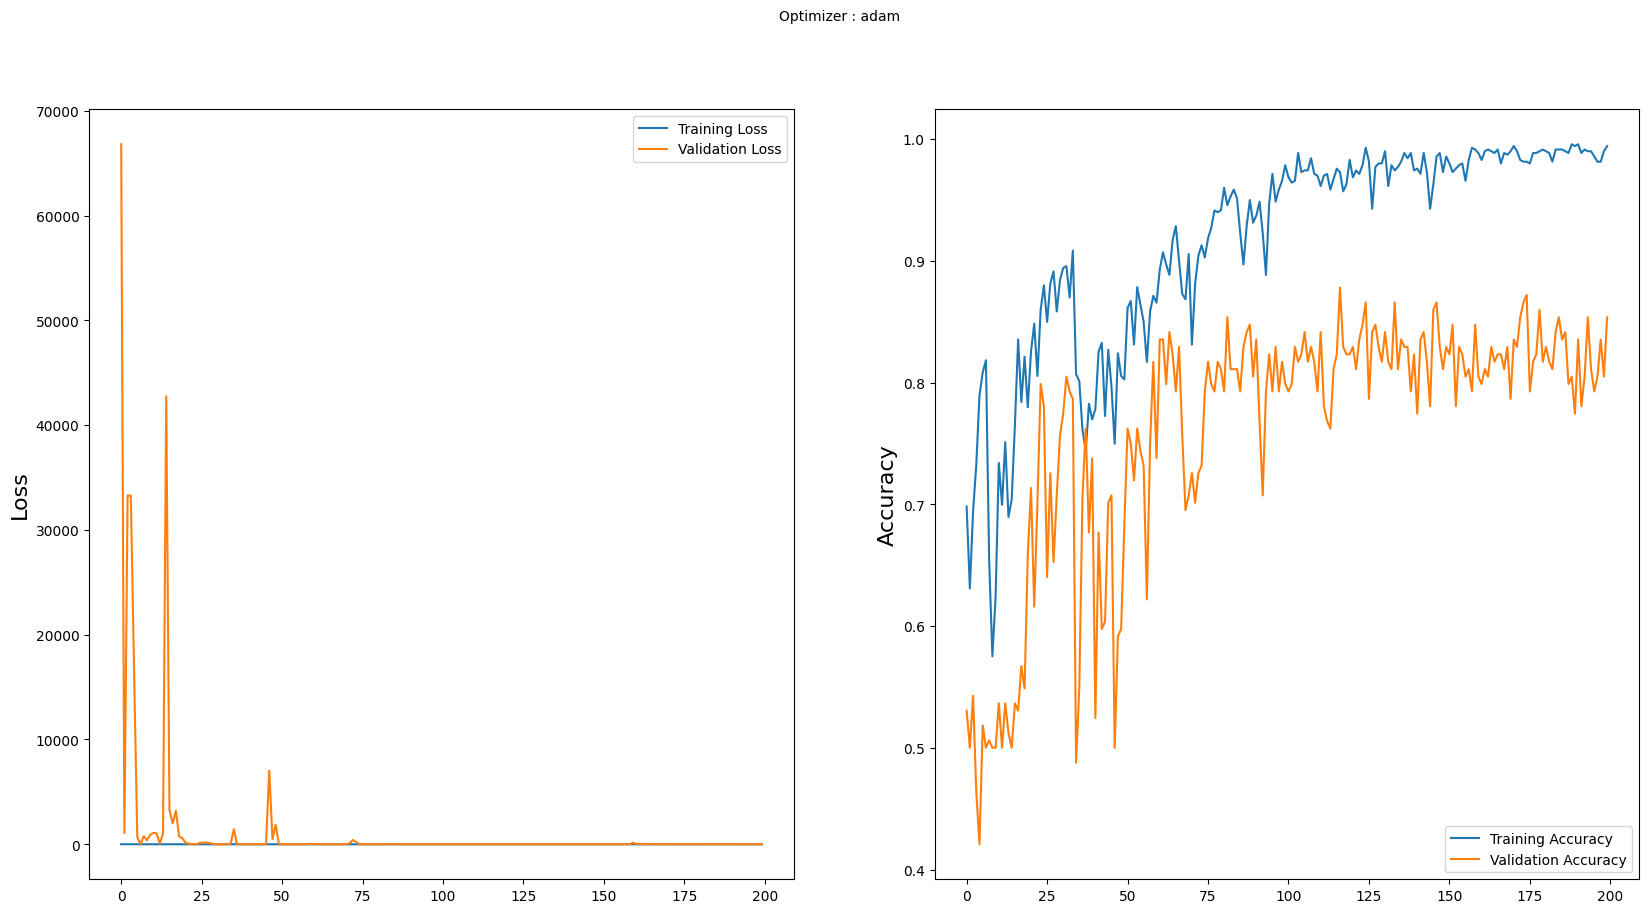

In [9]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Inception ResNet V2

In [10]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219055592/219055592 [==============================] - 2s 0us/step


In [11]:
x31 = Flatten()(inc.output)
predictionss = Dense(2, activation='softmax')(x31)

In [12]:
modelss1 = Model(inputs = inc.inputs, outputs = predictionss)
modelss1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [13]:
modelss1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss1.fit_generator(train_set1, validation_data=test_set1, epochs=100, steps_per_epoch=len(train_set1), validation_steps=len(test_set1))
x=r2

<ipython-input-13-89d6bfdfb54e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = modelss1.fit_generator(train_set1, validation_data=test_set1, epochs=100, steps_per_epoch=len(train_set1), validation_steps=len(test_set1))


Epoch 1/100
22/22 [==============================] - 130s 1s/step - loss: 1.4498 - accuracy: 0.7353 - val_loss: 7993.7119 - val_accuracy: 0.5000
Epoch 2/100
22/22 [==============================] - 18s 811ms/step - loss: 0.4180 - accuracy: 0.8784 - val_loss: 74.6210 - val_accuracy: 0.5000
Epoch 3/100
22/22 [==============================] - 19s 861ms/step - loss: 0.2348 - accuracy: 0.9227 - val_loss: 111323.6719 - val_accuracy: 0.5000
Epoch 4/100
22/22 [==============================] - 18s 801ms/step - loss: 0.4852 - accuracy: 0.9185 - val_loss: 145249.0312 - val_accuracy: 0.5000
Epoch 5/100
22/22 [==============================] - 18s 808ms/step - loss: 1.9160 - accuracy: 0.8984 - val_loss: 310174.4375 - val_accuracy: 0.5610
Epoch 6/100
22/22 [==============================] - 19s 825ms/step - loss: 0.6880 - accuracy: 0.8298 - val_loss: 3440.6467 - val_accuracy: 0.4756
Epoch 7/100
22/22 [==============================] - 19s 863ms/step - loss: 0.3108 - accuracy: 0.8941 - val_loss: 53

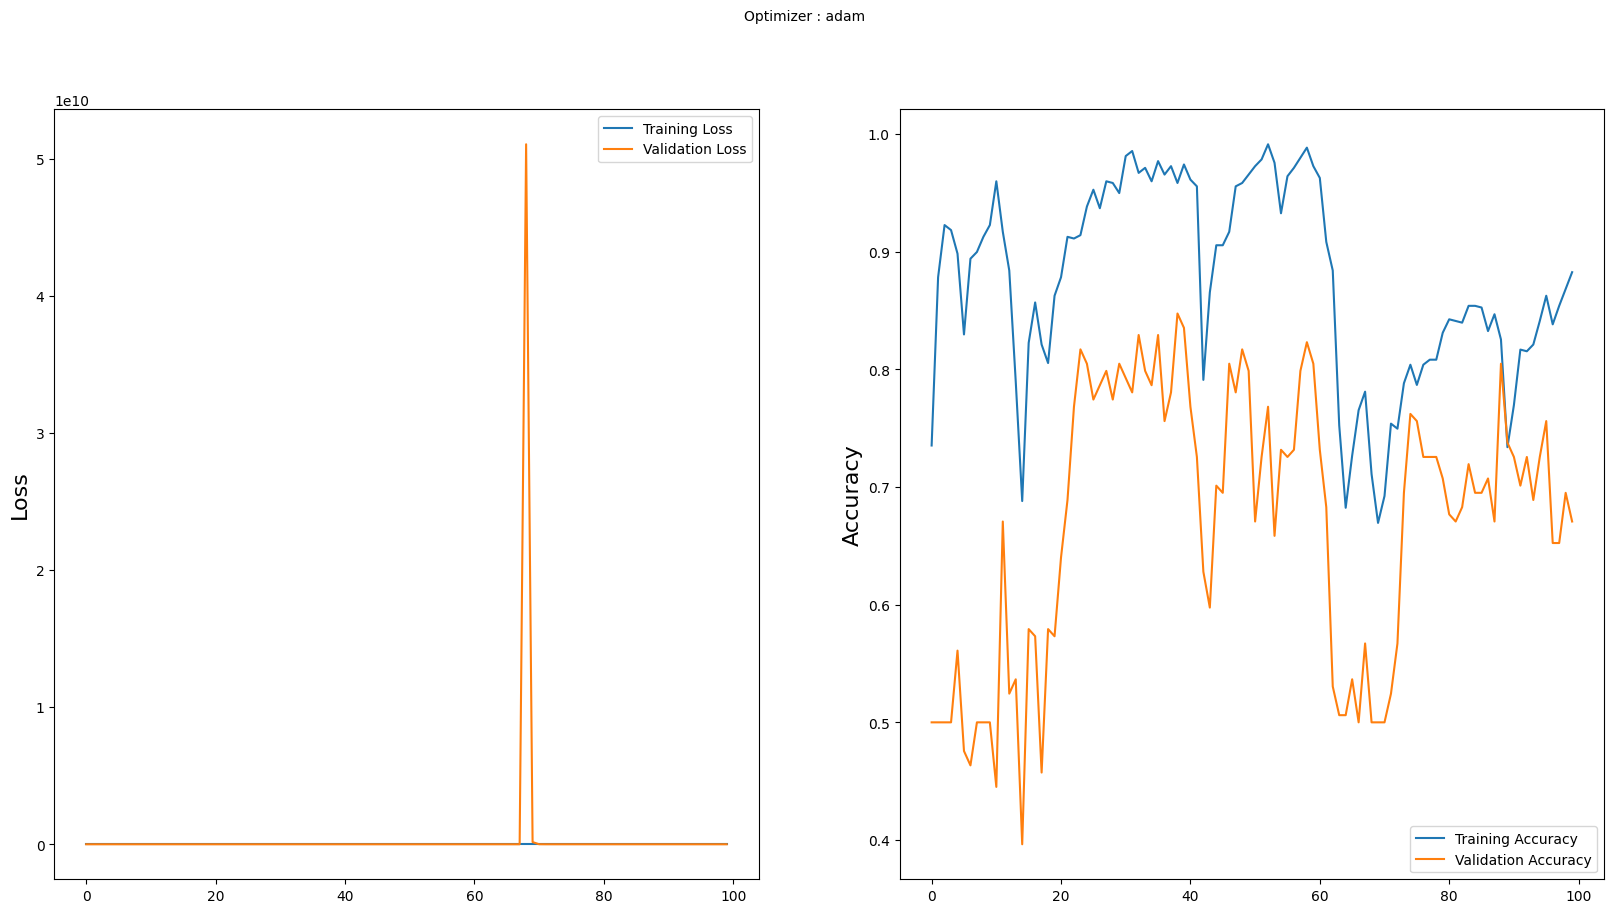

In [14]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

to overcome this, implementing regularization

Here, training loss is 0 and there is a sudden drop in the validation loss indicating overfitting.

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Flatten the output from 'mob1'
x1 = Flatten()(mob1.output)

# Add a Dense layer with L2 regularization
prediction1 = Dense(2, activation='softmax', kernel_regularizer='l2')(x1)

# Create the model with the modified Dense layer
model121 = Model(inputs=mob1.inputs, outputs=prediction1)

# Print the model summary
model121.summary()

# Compile the model with the loss function, optimizer, and metrics
model121.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [16]:
r1 = model121.fit(train_set1, validation_data=test_set1, epochs=200)

Epoch 1/200
22/22 [==============================] - 84s 810ms/step - loss: 1.8370 - accuracy: 0.6538 - val_loss: 2.9198 - val_accuracy: 0.5610
Epoch 2/200
22/22 [==============================] - 18s 804ms/step - loss: 0.4077 - accuracy: 0.8684 - val_loss: 0.7949 - val_accuracy: 0.8293
Epoch 3/200
22/22 [==============================] - 17s 748ms/step - loss: 0.2250 - accuracy: 0.9213 - val_loss: 1.0607 - val_accuracy: 0.7927
Epoch 4/200
22/22 [==============================] - 16s 724ms/step - loss: 0.1405 - accuracy: 0.9528 - val_loss: 0.8217 - val_accuracy: 0.8293
Epoch 5/200
22/22 [==============================] - 16s 725ms/step - loss: 0.0996 - accuracy: 0.9714 - val_loss: 8.4641 - val_accuracy: 0.8110
Epoch 6/200
22/22 [==============================] - 16s 731ms/step - loss: 0.0925 - accuracy: 0.9728 - val_loss: 4.7215 - val_accuracy: 0.8049
Epoch 7/200
22/22 [==============================] - 18s 803ms/step - loss: 0.0652 - accuracy: 0.9828 - val_loss: 0.8738 - val_accuracy:

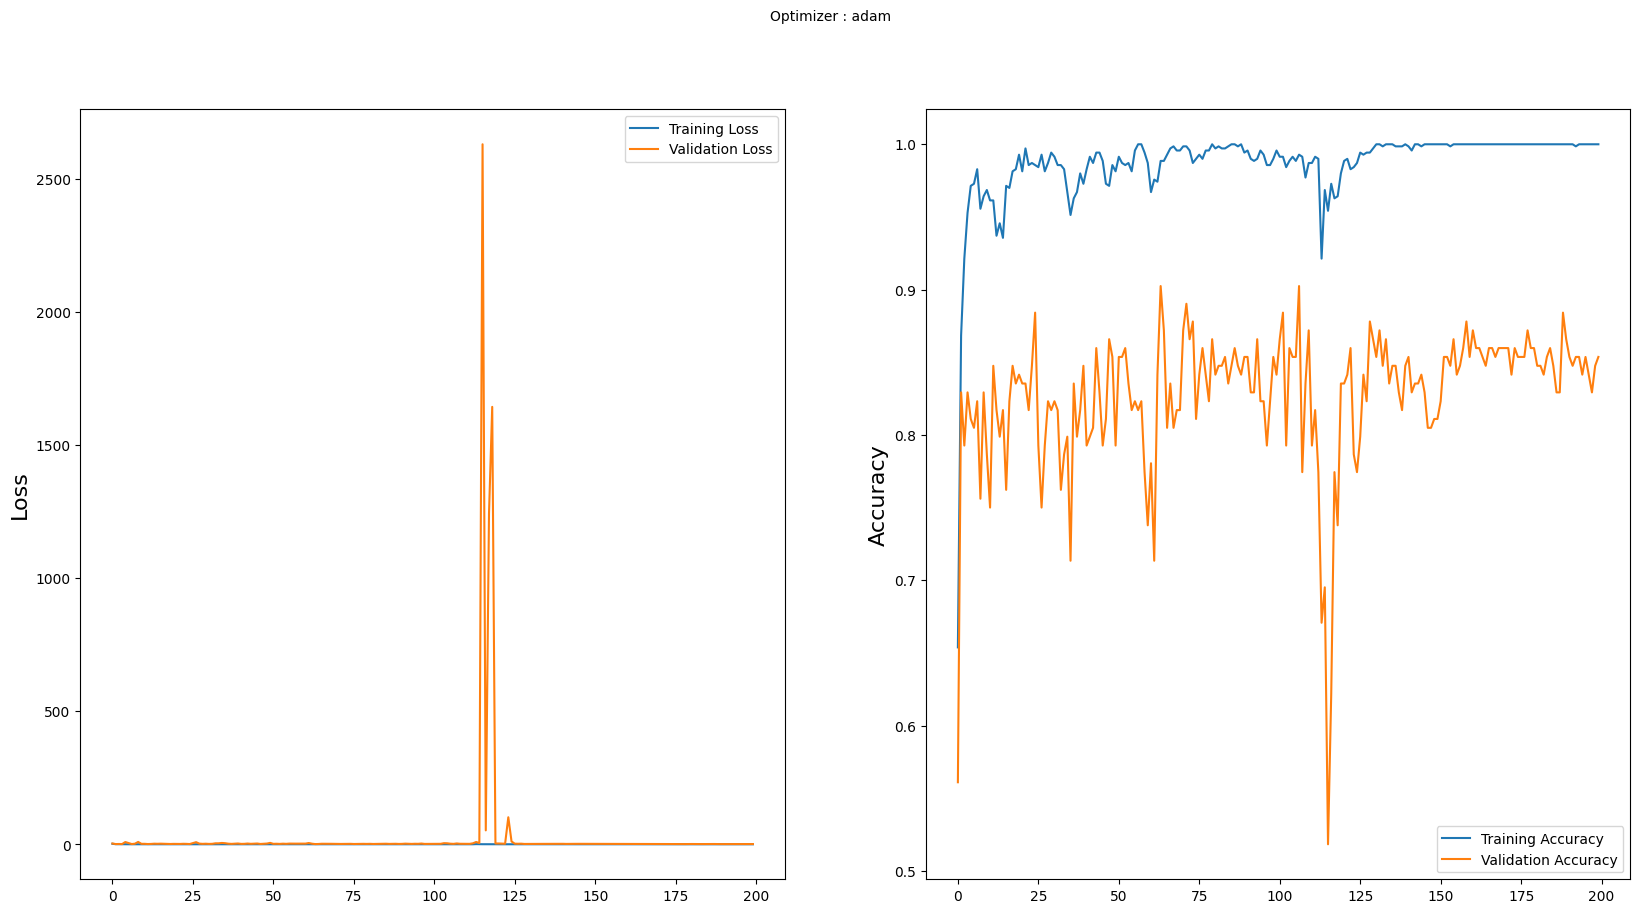

In [17]:
x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()